In [1]:
# from https://sisl.github.io/AutomotiveSimulator.jl/dev/tutorials/intersection/
using AutomotiveSimulator
using AutomotiveVisualization
using Random
using LinearAlgebra

In [2]:
function append_to_curve!(target::Curve, newstuff::Curve)
    s_end = target[end].s
    for c in newstuff
        push!(target, CurvePt(c.pos, c.s+s_end, c.k, c.kd))
    end
    return target
end

append_to_curve! (generic function with 1 method)

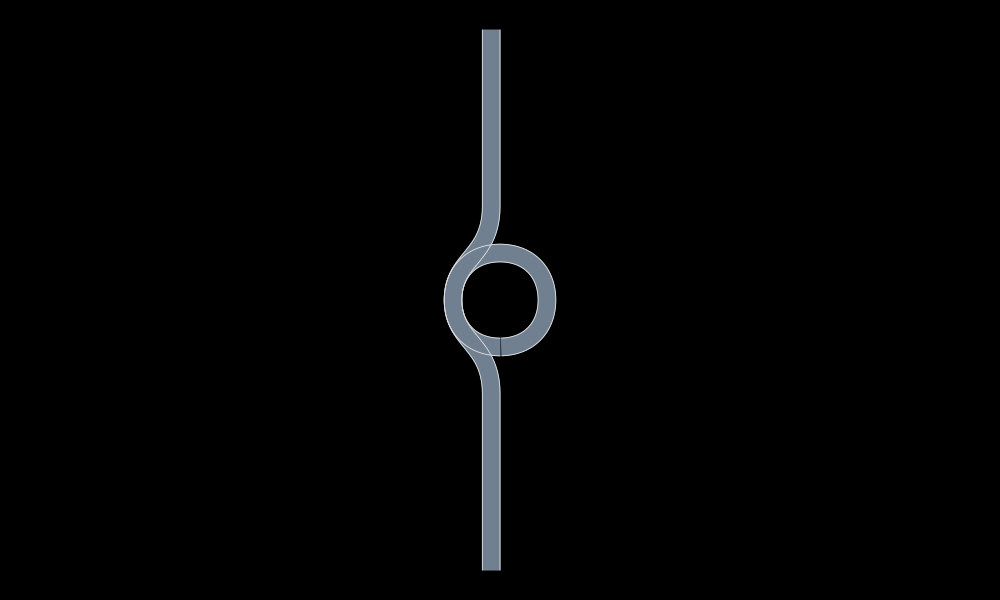

In [3]:
roadway = Roadway()
# make a loop
r = 5.0 # turn radius
w = DEFAULT_LANE_WIDTH

r=8.0
L = 30

curve = gen_bezier_curve(VecSE2(0,0.0),VecSE2(r,r,0.5*π), 0.6r, 0.6r, 51)[2:end]
append_to_curve!(curve, gen_bezier_curve(VecSE2(r,r,0.5*π), VecSE2(0,2*r, π),  0.6r, 0.6r, 51)[2:end])
append_to_curve!(curve, gen_bezier_curve(VecSE2(0,2*r,π), VecSE2(-r,r, 1.5*π),  0.6r, 0.6r, 51)[2:end])
append_to_curve!(curve, gen_bezier_curve(VecSE2(-r,r, 1.5*π), VecSE2(0,0.0),  0.6r, 0.6r, 51)[2:end])

lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

#curve = gen_straight_curve(convert(VecE2, B), convert(VecE2, B+VecE2(50,0)), 2)
#lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
#push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

# Add one in-and-out to the roundabout
curve = gen_straight_curve(convert(VecE2, VecSE2(0-w/2,3r+L,0)), convert(VecE2, VecSE2(0-w/2,3r,π)), 2)
curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(0-w/2,3r,-0.5*π), VecSE2(-r,r,-0.5π), 1.1r, 0.9r, 51)[2:end])
curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(-r,r,-0.5π), VecSE2(0-w/2,-r,-0.5*π), 0.9r, 1.1r, 51))
curve = append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(0-w/2,-r,0)), convert(VecE2, VecSE2(0-w/2,-r-L,0)), 2))


lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

snapshot = render([roadway])

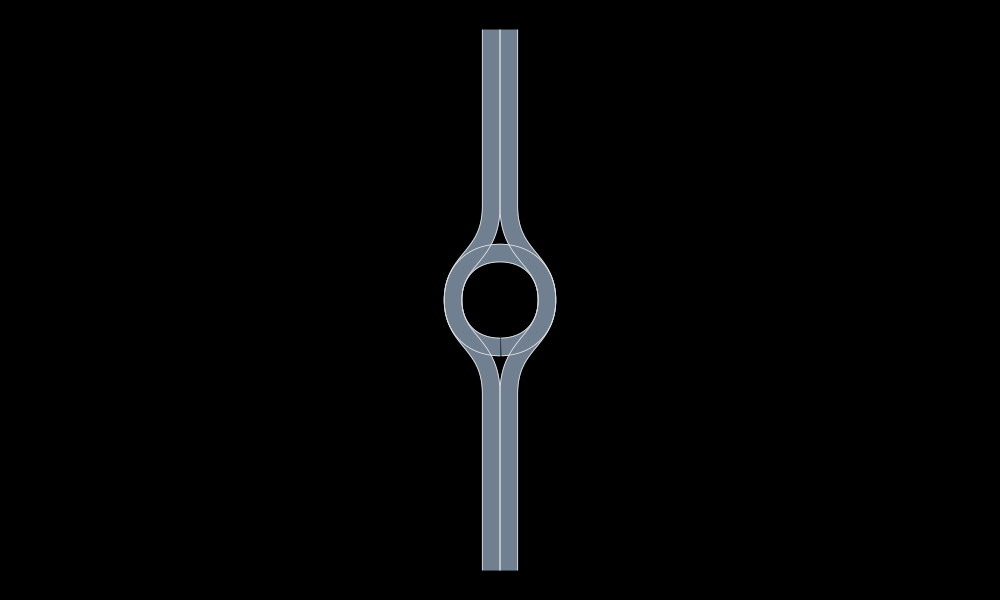

In [4]:
# Add second in-and-out to the roundabout
#=
curve = gen_bezier_curve(VecSE2(0.72r,0.27r,-0.75π),VecSE2(w/2,-r,-0.5*π), 0.6r, 0.6r, 51)[2:end]
append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(w/2,-r,-0.5*π)), convert(VecE2, VecSE2(w/2,-r-L,-0.5*π)), 2)[2:end])

append_to_curve!(gen_bezier_curve(VecSE2(0.72r,2r-0.27r,0.75π),VecSE2(w/2,3r,0.5*π), 0.6r, 0.6r, 51)[2:end])
append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(w/2,3r,0.5*π)), convert(VecE2, VecSE2(w/2,3r+L,0.5*π)), 2)[2:end])
=#
curve = gen_straight_curve(convert(VecE2, VecSE2(w/2,3r+L,0)), convert(VecE2, VecSE2(w/2,3r,π)), 2)
curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(w/2,3r,-0.5*π), VecSE2(r,r,-0.5π), 1.1r, 0.9r, 51)[2:end])
curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(r,r,-0.5π), VecSE2(w/2,-r,-0.5*π), 0.9r, 1.1r, 51))
curve = append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(w/2,-r,0)), convert(VecE2, VecSE2(w/2,-r-L,0)), 2))


lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

snapshot = render([roadway])

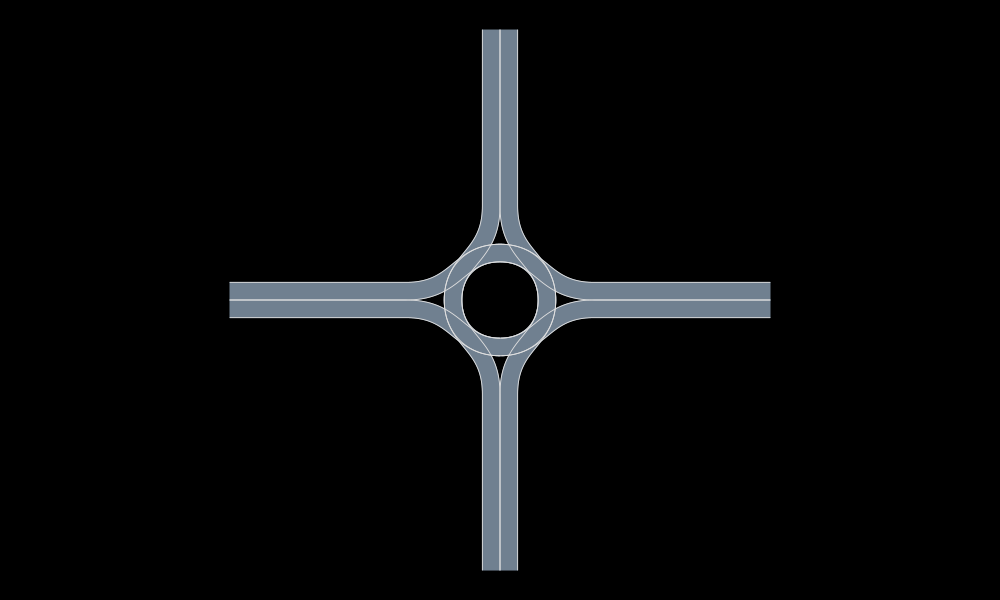

In [5]:
# Add third (horizontal) in-and-out to the roundabout
#=
curve = gen_bezier_curve(VecSE2(r-0.27r,r-0.72r,0.25π),VecSE2(2r,r-w/2,0), 0.6r, 0.6r, 51)[2:end]
append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(2r,r-w/2,0)), convert(VecE2, VecSE2(2r+L,r-w/2,0)), 2)[2:end])

append_to_curve!(gen_bezier_curve(VecSE2(-r+0.27r,r-0.72r,0.75π),VecSE2(-2r,r-w/2,π), 0.6r, 0.6r, 51)[2:end])
append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(-2r,r-w/2,π)), convert(VecE2, VecSE2(-2r-L,r-w/2,π)), 2)[2:end])
=#
curve = gen_straight_curve(convert(VecE2, VecSE2(-2r-L,r-w/2,0)), convert(VecE2, VecSE2(-2r,r-w/2, 0)), 2)
curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(-2r,r-w/2,0), VecSE2(0,0.,0), 1.1r, 0.9r, 51)[2:end])
curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(0,0.,0), VecSE2(2r,r-w/2,0), 0.9r, 1.1r, 51))
curve = append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(2r,r-w/2,0)), convert(VecE2, VecSE2(2r+L,r-w/2,0)), 2))

lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))

	curve = gen_straight_curve(convert(VecE2, VecSE2(-2r-L,r+w/2,0)), convert(VecE2, VecSE2(-2r,r+w/2, 0)), 2)
	curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(-2r,r+w/2,0), VecSE2(0,2r,0), 1.1r, 0.9r, 51)[2:end])
	curve = append_to_curve!(curve, gen_bezier_curve(VecSE2(0,2r,0), VecSE2(2r,r+w/2,0), 0.9r, 1.1r, 51))
	curve = append_to_curve!(curve, gen_straight_curve(convert(VecE2, VecSE2(2r,r+w/2,0)), convert(VecE2, VecSE2(2r+L,r+w/2,0)), 2))

	lane = Lane(LaneTag(length(roadway.segments)+1,1), curve)
	push!(roadway.segments, RoadSegment(lane.tag.segment, [lane]))


snapshot = render([roadway])

In [6]:
include("lane_specific_driver.jl")
#include("make_roundabout.jl")
#roadway = make_roundabout()
#snapshot = render([roadway])

In [13]:
#using Reel

timestep = 0.1
nticks = 300

vs0 = VehicleState(VecSE2(-L, r-DEFAULT_LANE_WIDTH/2, 0.0), roadway, 8.0)
vs1 = VehicleState(VecSE2(L, r+DEFAULT_LANE_WIDTH/2, π), roadway, 9.0) # desired speed 9.0
snail = VehicleState(VecSE2(DEFAULT_LANE_WIDTH/2, -L, 0.5π), roadway, 5.0)


scene = Scene([Entity(vs0, VehicleDef(), 1),
               Entity(vs1, VehicleDef(), 2),
               Entity(snail, VehicleDef(), 3)
            ])

car_colors = Dict(:UNSAFE => RGB(0.95, 0.1, 0.1),
              :SAFE   => RGB(0.1, 0.95, 0.1),
              :RL     => RGB(0.6, 0.1, 0.6),)

colors = Dict( 1 => car_colors[:UNSAFE],
2 => car_colors[:UNSAFE],
3 => car_colors[:UNSAFE])

models = Dict(1 => InterDriver(LaneSpecificAccelLatLon(0.0,0.0), 0, 10, 10, :ZERO, :SAFE, 1.0),
              2 => InterDriver(LaneSpecificAccelLatLon(0.0,0.0), 0, 10, 10, :ZERO, :UNSAFE, 0.5),
              3 => InterDriver(LaneSpecificAccelLatLon(0.0,0.0), 0, 10, 10, :ZERO, :SAFE, 0.5),
             )


scenes = simulate(scene, roadway, models, nticks, timestep)
#snapshot = render(renderables)

301-element Vector{EntityScene{VehicleState, VehicleDef, Int64}}:
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 ⋮
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, Veh

In [14]:
using Interact
using Reel
using Blink
#md
w = Window()
viz = @manipulate for step in 1 : length(scenes)
    render([roadway, scenes[step]])
end
body!(w, viz)

Page(2, WebSocket(server, CONNECTED), Dict{String, Any}("webio" => Blink.AtomShell.var"#22#23"{Blink.AtomShell.WebIOBlinkComm}(Blink.AtomShell.WebIOBlinkComm(Window(2, Electron(Process(`/home/esoroka/.julia/packages/Blink/mwJC9/deps/atom/electron /home/esoroka/.julia/packages/Blink/mwJC9/src/AtomShell/main.js port 3267`, ProcessRunning), Sockets.TCPSocket(RawFD(51) active, 0 bytes waiting), Dict{String, Any}("callback" => Blink.var"#1#2"())), Page(#= circular reference @-5 =#), Task (done) @0x00007f122d91fdc0))), "callback" => Blink.var"#1#2"()), Distributed.Future(1, 1, 2, Some(true)))

In [12]:
#=
#md
w = Window()
viz = @manipulate for i = 1 : length(scenes)
    renderables = [
    roadway,
    (FancyCar(car=veh, color=colors[veh.id]) for veh in scenes[i])...
    ]
    render(renderables)
end
body!(w, viz)
=#